PAS 1 ANALITZAR NOSTRE DATASET (PRACTICA 1)

In [4]:
%matplotlib notebook
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats
from ipywidgets import interact

#remove warnings
import warnings
warnings.filterwarnings('ignore')
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('pokemon.csv')
# dataset = dataset.drop(['japanese_name', 'name', 'type1', 'type2','abilities'], axis=1) # no agafem el primer atribut serial number, ja que és un index i no te res de relació amb els altres atributs.
dataset = dataset.drop(['japanese_name', 'name', 'type1', 'type2'], axis=1) # no agafem el primer atribut serial number, ja que és un index i no te res de relació amb els altres atributs.
data = dataset.values

x = data[:, 0:-2] # no agafem el primer atribut serial number, ja que és un index i no te res de relació amb els altres atributs.
y = data[:, -1]

index = dataset.columns[:40]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (801, 37)
Dimensionalitat de les entrades X (801, 35)
Dimensionalitat de l'atribut Y (801,)


D'aqui veiem que la nostra base de dades presenta 801 elements. Ara mirarem si presenta valors no existents, es a dir que el seu valor sigui NaN. Aquests valors poden fer variar el resultat del nostre model i és important tenir-los en compte.

In [5]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
abilities             0
against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
classfication         0
defense               0
experience_growth     0
height_m             20
hp                    0
percentage_male      98
pokedex_number        0
sp_attack             0
sp_defense            0
speed                 0
weight_kg            20
generation            0
is_legendary          0
dtype: int64


In [6]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD:


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.000,1.000,1.000,0.500,0.500,0.500,2.000,2.000,1.000,0.250,1.000,2.000,1.000,1.000,2.000,1.000,1.000,0.500,49,5120,70,318,45,Seed Pokémon,49,1059860,0.700,45,88.100,1,65,65,45,6.900,1,0
1,"['Overgrow', 'Chlorophyll']",1.000,1.000,1.000,0.500,0.500,0.500,2.000,2.000,1.000,0.250,1.000,2.000,1.000,1.000,2.000,1.000,1.000,0.500,62,5120,70,405,45,Seed Pokémon,63,1059860,1.000,60,88.100,2,80,80,60,13.000,1,0
2,"['Overgrow', 'Chlorophyll']",1.000,1.000,1.000,0.500,0.500,0.500,2.000,2.000,1.000,0.250,1.000,2.000,1.000,1.000,2.000,1.000,1.000,0.500,100,5120,70,625,45,Seed Pokémon,123,1059860,2.000,80,88.100,3,122,120,80,100.000,1,0
3,"['Blaze', 'Solar Power']",0.500,1.000,1.000,1.000,0.500,1.000,0.500,1.000,1.000,0.500,2.000,0.500,1.000,1.000,1.000,2.000,0.500,2.000,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.600,39,88.100,4,60,50,65,8.500,1,0
4,"['Blaze', 'Solar Power']",0.500,1.000,1.000,1.000,0.500,1.000,0.500,1.000,1.000,0.500,2.000,0.500,1.000,1.000,1.000,2.000,0.500,2.000,64,5120,70,405,45,Flame Pokémon,58,1059860,1.100,58,88.100,5,80,65,80,19.000,1,0


Podem observar estadístiques de la nostra base de dades, com la desviació standard d'aquesta (std) , la mitjana de cada variable (mean) entre altres. Aixó ens serveix per descobrir quina distribució segueix cada variable i el seu tipus.

In [7]:
dataset.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,781.000,801.000,703.000,801.000,801.000,801.000,801.000,781.000,801.000,801.000
mean,0.996,1.057,0.969,1.074,1.069,1.066,1.135,1.193,0.985,1.034,1.098,1.208,0.887,0.975,1.005,1.250,0.983,1.058,77.858,7191.011,65.362,428.377,73.009,1054995.905,1.164,68.959,55.156,401.000,71.306,70.911,66.335,61.378,3.690,0.087
std,0.597,0.438,0.353,0.655,0.522,0.717,0.692,0.604,0.558,0.789,0.739,0.735,0.266,0.549,0.495,0.697,0.500,0.607,32.159,6558.220,19.599,119.204,30.769,160255.835,1.080,26.576,20.262,231.373,32.354,27.943,28.908,109.355,1.930,0.283
min,0.250,0.250,0.000,0.000,0.250,0.000,0.250,0.250,0.000,0.250,0.000,0.250,0.000,0.000,0.000,0.250,0.250,0.250,5.000,1280.000,0.000,180.000,5.000,600000.000,0.100,1.000,0.000,1.000,10.000,20.000,5.000,0.100,1.000,0.000
25%,0.500,1.000,1.000,0.500,1.000,0.500,0.500,1.000,1.000,0.500,1.000,0.500,1.000,0.500,1.000,1.000,0.500,0.500,55.000,5120.000,70.000,320.000,50.000,1000000.000,0.600,50.000,50.000,201.000,45.000,50.000,45.000,9.000,2.000,0.000
50%,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,75.000,5120.000,70.000,435.000,70.000,1000000.000,1.000,65.000,50.000,401.000,65.000,66.000,65.000,27.300,4.000,0.000
75%,1.000,1.000,1.000,1.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,2.000,1.000,1.000,1.000,2.000,1.000,1.000,100.000,6400.000,70.000,505.000,90.000,1059860.000,1.500,80.000,50.000,601.000,91.000,90.000,85.000,64.800,5.000,0.000
max,4.000,4.000,2.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,1.000,4.000,4.000,4.000,4.000,4.000,185.000,30720.000,140.000,780.000,230.000,1640000.000,14.500,255.000,100.000,801.000,194.000,230.000,180.000,999.900,7.000,1.000


<IPython.core.display.Javascript object>


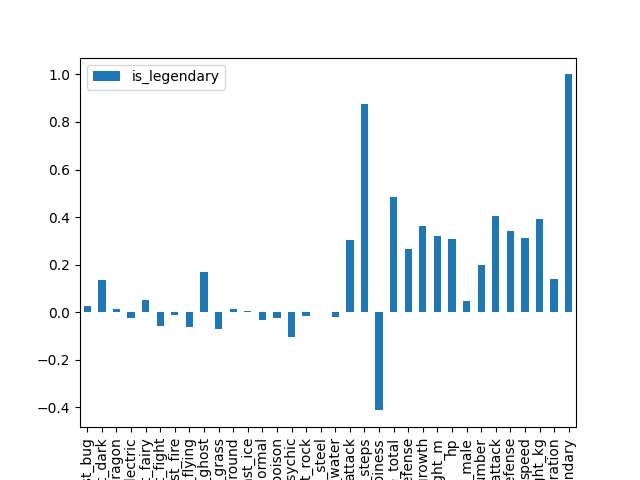

[0.30329459 0.87348834 0.48543982 0.36103809 0.32215494 0.30840535
 0.40628116 0.34324053 0.31163908 0.39302299 1.        ]


In [8]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

# print("Per visualitzar la correlació entre els atributs d'entrada y el atribut target:")
# print(correlacio.is_legendary.to_frame())

# ax = sns.heatmap(correlacio.is_legendary.to_frame() , annot=True, linewidths=.5)

correlacio.is_legendary.to_frame().plot.bar()

values = correlacio.is_legendary.values
values = values[values > 0.3]

print(values)

def clean_dataset(dataset: pd.core.frame.DataFrame, type = 'default') -> pd.core.frame.DataFrame:
    """
    Funció que processa els valors "NULLS" d'un dataset aplicant l'estratègia o tractament especificat
    :param dataset: DataFrame amb la informació que es vol filtrar
    :param type: Indica el tipus de tractament dels  "NaN"
    :return: DataFrame aplicant el mètode especificat a totes les línies amb valors "NaN"
    """
    if type == 'default':
        # Deletes all rows with missing values
        return dataset.dropna()
    elif type == 'backfill':
        # Applies pandas method of backfilling
        return dataset.fillna(method='backfill', axis=1)
    elif type == 'mean':
        # Replaces missing values with the mean of the column
        return dataset.fillna(dataset.mean())
    else:
        print("::-> ERROR : clean_dataset - " + str(type) + " is not a valid option...")


In [9]:
from sklearn.preprocessing import OneHotEncoder

def preprocessing_model(light = False):
    # PREPROCESSING

    dataset = load_dataset('pokemon.csv')
    
    # modify row 773 column capture_rate
    dataset.loc[773, 'capture_rate'] = 30
    
    # Feature Selection : Elimianció atributs que no aporten informació
    dataset = dataset.drop(['japanese_name', 'name', 'pokedex_number'], axis=1)

    # Eliminació de classification, doncs és un atribut que expressa si és legendary o no i aquest és el nostre objectiu a determinar
    dataset = dataset.drop(['classfication'], axis=1)
    
    if not light:
        # Categoritzar Type1
        # Definim encoder
        encoder = OneHotEncoder(sparse=False)
        # Creem variable auxiliar per guardar la informació del atribut type1
        new_data_1 = pd.DataFrame (encoder.fit_transform(dataset[['type1']]))
        # Assignem els noms a les columnes
        new_data_1.columns = encoder.get_feature_names(['type1'])
        # Eliminem la columna del dataset
        dataset.drop(['type1'] ,axis=1, inplace=True)

        # Categoritzar Type2
        # Modifiquem nom de la columna type 2 a type 1 per tal de poder fer un merge posteriorment
        # Utilitzarem el mateix procés que amb la variable type1
        dataset = dataset.rename(columns = {'type2' : 'type1'})
        new_data_2 = pd.DataFrame (encoder.fit_transform(dataset[['type1']]))
        new_data_2.columns = encoder.get_feature_names(['type1'])
        dataset.drop(['type1'] ,axis=1, inplace=True)

        # Sumem les dues taules type
        new_data_type = new_data_1 + new_data_2
        # Afegim al final del dataset les taules type1 i type2 codificades amb OneHotEncoder
        dataset = pd.concat([dataset, new_data_type], axis=1)

        # Eliminem la columna type amb valors NULLS:
        dataset = dataset.drop(['type1_nan'], axis=1)

        #Categoritzar Abilities
        
        import ast
        ab = dataset['abilities'].to_numpy()
        a = []
        for index, row in enumerate(ab):
            if str(row) != 'nan':
                row = ast.literal_eval(row)
                a.append(row)
            else:
                print("Error", index)

        a = np.array(a).flatten()

        flat_list = [item for sublist in a for item in sublist]

        abilitats_uniques = np.unique(flat_list).reshape(-1,1)

        # Declarem encoder tipus OneHotEncoder
        enc = OneHotEncoder(handle_unknown='ignore')
        # Declarem Dataframe auxiliar amb les noves columnes
        enc_df = pd.DataFrame(enc.fit_transform(abilitats_uniques).toarray(), columns=['abilities_' + str(i[0]) for i in abilitats_uniques])

        dataset = dataset.join(enc_df)
        
        dataset = dataset.drop(['abilities'], axis=1)
    else:
        dataset = dataset.drop(['abilities'], axis=1)
    # Tractament valors NULLS -> Aplicarem mètode de la mitjana
    dataset = clean_dataset(dataset, type='mean')

    return dataset

In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

light = False
dataset = preprocessing_model(light)
dataset['is_legendary'].value_counts()

if not light:
    y = dataset.values[:,34].astype(int)
    x = dataset.drop(['is_legendary'] ,axis=1, inplace=True)
    x = dataset.values[:,:]
else:
    data = dataset.values
    x = data[:, 0:-2] # no agafem el primer atribut serial number, ja que és un index i no te res de relació amb els altres atributs.
    y = data[:, -1].astype(int)

# Random over sampler crea dades 'falses' a partir de les dades 'reals'
# Esta el SMOTE que utilitza KNN.
over_sampler = RandomOverSampler(random_state=0)
over_sampler = SMOTE()
X_res, y_res = over_sampler.fit_resample(x, y)

print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y)}")




Training target statistics: Counter({0: 724, 1: 724})
Testing target statistics: Counter({0: 724, 1: 77})


In [11]:
def roc_and_pr(y_v, probs):
    n_classes = 2
    from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

    # Compute Precision-Recall and plot curve
    precision = {}
    recall = {}
    average_precision = {}
    plt.figure()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
        average_precision[i] = average_precision_score(y_v == i, probs[:, i])

        plt.plot(recall[i], precision[i],
        label='Precision-recall curve of class {0} (area = {1:0.2f})'
                            ''.format(i, average_precision[i]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc="upper right")

        
    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    # Plot ROC curve
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
    plt.legend()

REGRESSOR LINEAL

In [12]:
#remove warnings
# import warnings
# warnings.filterwarnings('ignore')
#scale data
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_scaled = normalize(X_res)


<IPython.core.display.Javascript object>


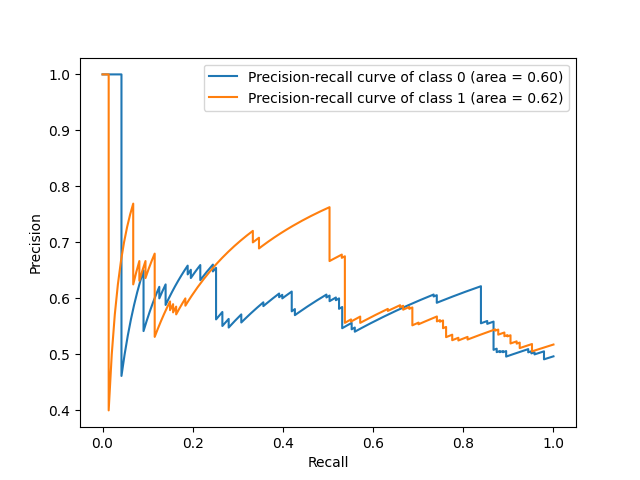

<IPython.core.display.Javascript object>


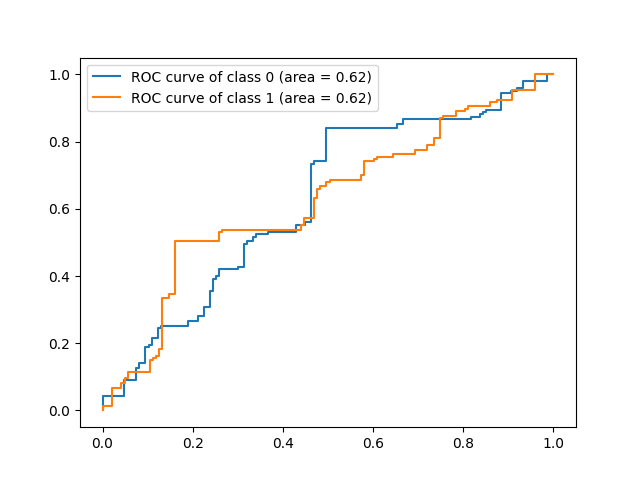

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def printModelScore(model, X_train, y_train, X_test, y_test):
    print("\n")
    # print(type(model).__name__)
    # print ('Training Score:', model.score(X_train, y_train) )
    # print ('Testing Score:', model.score(X_test, y_test) )
    # print ('Training MSE: ', np.mean((model.predict(X_train) - y_train)**2))
    # print ('Testing MSE: ', np.mean((model.predict(X_test) - y_test)**2))
    # print ('')
    report = classification_report(y_test, model.predict(X_test))
    print(report)
    print("\n")

# x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.5, test_size=0.5, random_state=0)

# param_grid = {"n_neighbors": [5, 10, 20, 50], "weights":['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# log_reg = KNeighborsClassifier()
# # ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.
# grid_search = GridSearchCV(log_reg, param_grid, cv=5,
#                           scoring='neg_mean_squared_error', verbose=1)
 
# grid_search.fit(x_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_score_)
# print("Dades sense balancejar ni standaritzar")
# log_reg = KNeighborsClassifier(algorithm='auto', n_neighbors=5, weights='distance')
# log_reg.fit(x, y)
# # y_pred = log_reg.predict(x)

# printModelScore(log_reg, x, y, x, y)



# print("Dades sense balancejar standaritzar")
# x_scaled = StandardScaler().fit_transform(x)
# log_reg = KNeighborsClassifier(algorithm='auto', n_neighbors=5, weights='distance')
# log_reg.fit(x_scaled, y)
# y_pred = log_reg.predict(x)

# printModelScore(log_reg, x_scaled, y, x_scaled, y)


# print("Dades  balancejar sense standaritzar")
# log_reg = KNeighborsClassifier(algorithm='auto', n_neighbors=5, weights='distance')
# log_reg.fit(X_res, y_res)
# y_pred = log_reg.predict(X_res)

# printModelScore(log_reg, X_res, y_res, X_res, y_res)


# print("Dades  balancejar standaritzar")
# x_scaled = StandardScaler().fit_transform(X_res)
# log_reg = KNeighborsClassifier(algorithm='auto', n_neighbors=5, weights='distance')
# log_reg.fit(x_scaled, y_res)
# y_pred = log_reg.predict(x_scaled)

# printModelScore(log_reg, x_scaled, y_res, x_scaled, y_res)


x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.8, test_size=0.2, random_state=0)

log_reg = LogisticRegression(C=0.001, fit_intercept=False, penalty='l2', tol=1e-05)
log_reg.fit(x_train, y_train)

probs = log_reg.predict_proba(x_test)
roc_and_pr(y_test, probs)

# printModelScore(log_reg, x_train, y_train, x_test, y_test)

# # cross-validation

# scores = cross_val_score(log_reg, x_train, y_train, cv=6, scoring='accuracy')
# print("Cross-validation scores:", scores)
# print("Mean:", scores.mean())





In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def printModelScore(model, X_train, y_train, X_test, y_test):
    print("\n")
    # print(type(model).__name__)
    # print ('Training Score:', model.score(X_train, y_train) )
    # print ('Testing Score:', model.score(X_test, y_test) )
    # print ('Training MSE: ', np.mean((model.predict(X_train) - y_train)**2))
    # print ('Testing MSE: ', np.mean((model.predict(X_test) - y_test)**2))
    # print ('')
    report = classification_report(y_test, model.predict(X_test))
    print(report)
    print("\n")

# x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.5, test_size=0.5, random_state=0)

# param_grid = {"n_neighbors": [5, 10, 20, 50], "weights":['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# log_reg = KNeighborsClassifier()
# # ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.
# grid_search = GridSearchCV(log_reg, param_grid, cv=5,
#                           scoring='neg_mean_squared_error', verbose=1)
 
# grid_search.fit(x_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_score_)
# print("Dades sense balancejar ni standaritzar")
# log_reg = KNeighborsClassifier(algorithm='auto', n_neighbors=5, weights='distance')
# log_reg.fit(x, y)
# # y_pred = log_reg.predict(x)

# printModelScore(log_reg, x, y, x, y)


# print("Dades sense balancejar standaritzar")
# x_scaled = StandardScaler().fit_transform(x)
# log_reg = KNeighborsClassifier(algorithm='auto', n_neighbors=5, weights='distance')
# log_reg.fit(x_scaled, y)
# y_pred = log_reg.predict(x)

# printModelScore(log_reg, x_scaled, y, x_scaled, y)


# print("Dades  balancejar sense standaritzar")
# log_reg = KNeighborsClassifier(algorithm='auto', n_neighbors=5, weights='distance')
# log_reg.fit(X_res, y_res)
# y_pred = log_reg.predict(X_res)

# printModelScore(log_reg, X_res, y_res, X_res, y_res)


# print("Dades  balancejar standaritzar")
# x_scaled = StandardScaler().fit_transform(X_res)
# log_reg = KNeighborsClassifier(algorithm='auto', n_neighbors=5, weights='distance')
# log_reg.fit(x_scaled, y_res)
# y_pred = log_reg.predict(x_scaled)

# printModelScore(log_reg, x_scaled, y_res, x_scaled, y_res)

sizes = [ [0.8, 0.2], [0.5, 0.5], [0.7, 0.3]]

for size in sizes:
    print("\n")
    print("KNN With {0}".format(size))
    x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, train_size=size[0], test_size=size[1], random_state=0)

    log_reg = KNeighborsClassifier(algorithm='auto', n_neighbors=5, weights='distance')
    log_reg.fit(x_train, y_train)

    printModelScore(log_reg, x_train, y_train, x_test, y_test)


    scores = cross_val_score(log_reg, x_train, y_train, cv=6, scoring='accuracy')
    print("Cross-validation scores:", scores)
    print("Mean:", scores.mean())







KNN With [0.8, 0.2]


              precision    recall  f1-score   support

           0       0.94      0.81      0.87       143
           1       0.84      0.95      0.89       147

    accuracy                           0.88       290
   macro avg       0.89      0.88      0.88       290
weighted avg       0.89      0.88      0.88       290



Cross-validation scores: [0.82901554 0.91709845 0.86010363 0.87046632 0.87564767 0.89637306]
Mean: 0.8747841105354057


KNN With [0.5, 0.5]


              precision    recall  f1-score   support

           0       0.91      0.78      0.84       359
           1       0.81      0.93      0.87       365

    accuracy                           0.85       724
   macro avg       0.86      0.85      0.85       724
weighted avg       0.86      0.85      0.85       724



Cross-validation scores: [0.80991736 0.8677686  0.87603306 0.87603306 0.79166667 0.9       ]
Mean: 0.8535697887970617


KNN With [0.7, 0.3]


              precision    recall 